In [7]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

[('꿈이', 2), ('우리에게는', 1), ('있어요', 1), ('그', 1), ('무엇이든', 1)]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<Axes: xlabel='Samples', ylabel='Counts'>

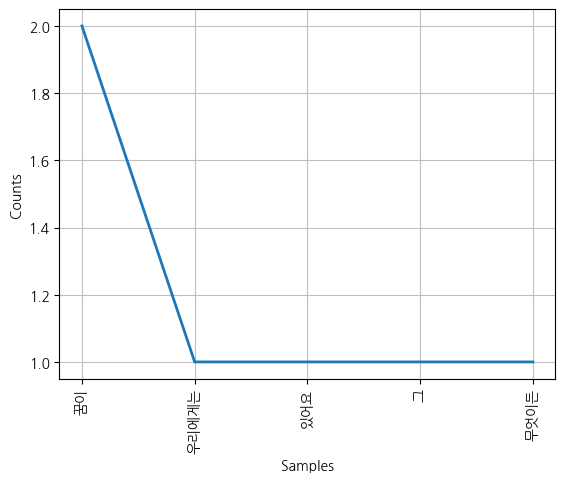

In [1]:
# 한글깨짐 방지 세션 실행 후 반드시 런타임 세션을 재시작해야 함

# 어휘분석
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

nltk.download('punkt_tab')

text = "우리에게는 꿈이 있어요 그 꿈이 무엇이든 꿈을 이루어요"
tokens = word_tokenize(text)
freq_dist = FreqDist(tokens)

print(freq_dist.most_common(5))  # 상위 5개 단어
freq_dist.plot(5)  # 상위 5개 단어 빈도 시각화


In [ ]:
# 문장길이 분석
from nltk import FreqDist
from nltk.tokenize import word_tokenize

text = "이 영화는 정말 재미있고 감동적이었다. 다시 보고 싶다."
sentences = text.split('.')
sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
print(f"평균 문장 길이: {sum(sentence_lengths)/len(sentence_lengths)}")

In [2]:
# 문장길이 분석

from nltk import FreqDist
from nltk.tokenize import word_tokenize

text = "이 영화는 정말 재미있고 감동적이었다. 다시 보고 싶다."
sentences = text.split('.')
sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
print(f"평균 문장 길이: {sum(sentence_lengths)/len(sentence_lengths)}")


평균 문장 길이: 4.0


In [4]:
# 품사 분포 분석

# konlpy 설치
!pip install konlpy

from konlpy.tag import Okt
# Okt 객체 생성
okt = Okt()
# 한글 텍스트
text = "이 영화는 정말 재미있고 감동적이었다."
# 품사 태깅
pos_tags = okt.pos(text)

# 품사 약어를 한글로 매핑
pos_to_korean = {
    "Noun": "명사", "Verb": "동사", "Adjective": "형용사", "Adverb": "부사",
    "Determiner": "관형사", "Exclamation": "감탄사", "Josa": "조사",
    "Eomi": "어미", "PreEomi": "선어말어미", "Conjunction": "접속사",
    "Modifier": "수식어", "VerbPrefix": "동사접두사", "Suffix": "접미사",
    "Punctuation": "구두점", "Foreign": "외국어", "Alpha": "알파벳",
    "Number": "숫자", "Unknown": "알 수 없음" }
# 품사를 한글로 변환
pos_tags_korean = [(word, pos_to_korean.get(pos, pos)) for word, pos in pos_tags]
# 결과 출력
print(pos_tags_korean)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 26.8 MB/s eta 0:00:00
[('이', '명사'), ('영화', '명사'), ('는', '조사'), ('정말', '명사'), ('재미있고', '형용사'), ('감동', '명사'), ('적', '접미사'), ('이었다', '동사'), ('.', '구두점')]


In [5]:
# 감정 분석
!pip install transformers
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
result = sentiment_analyzer("이 영화는 정말 재미있고 감동적이었다.")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9038873314857483}]
